In [175]:
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2

In [176]:
def faster_rcnn_detection(image_path, class_names_path, net, confidence):
    # read the image and grab its spatial dimensions
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    image_copy = np.copy(image)
    
    # read the class names from the file
    with open(class_names_path) as f:
        class_names = open(class_names_path).read().strip().split("\n")
        
    np.random.seed(123)
    colors = np.random.randint(0, 255, size=(len(class_names), 3), 
                               dtype="uint8").astype("float")
    
    # construct a blob from the input image and then 
    tensor = cv2.dnn.blobFromImage(image, size=(300, 300), swapRB=True,
                                   crop=False)
    
    # perform a forward pass of the YOLO object detector, 
    # giving us our bounding boxes and associated probabilities
    net.setInput(tensor)
    start = time.time()
    detections = net.forward()
    end = time.time()
    
    # show timing information on YOLO
    print("Forward Time: Faster RCNN took {:.6f} seconds.".format(end - start))
    
    for i in np.arange(0, detections.shape[2]):
        # extract the confidence (i.e., probability) associated with the
        # prediction
        confidence_ = float(detections[0, 0, i, :][2])
        # filter out weak detections by ensuring the `confidence` is
        # greater than the minimum confidence
        if confidence_ > confidence:
            # extract the index of the class label from the `detections`,
            # then compute the (x, y)-coordinates of the bounding box for
            # the object
            idx = int(detections[0, 0, i, 1])
            box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
            (startX, startY, endX, endY) = box.astype("int")
            # display the prediction
            label = "{}: {:.2f}%".format(class_names[idx], confidence_ * 100)
            cv2.rectangle(image_copy, (startX, startY), (endX, endY), 
                          colors[idx], 2)
            y = startY - 15 if startY - 15 > 15 else startY + 15
            cv2.putText(image_copy, label, (startX, y),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, colors[idx], 2)
            
    plt.figure(figsize=(15, 12))
    plt.imshow(image_copy[:, :, [2, 1, 0]])
    plt.axis('off')
    plt.grid(False)
    plt.show()      

In [177]:
model_path = "./model/frozen_inference_graph.pb"
proto_path = "./model/faster_rcnn_resnet50_coco_2018_01_28.pbtxt"
class_names_path = "./model/coco.names"

In [178]:
net = cv2.dnn.readNetFromTensorflow(model_path, proto_path)

In [182]:
CONFIDENCE = 0.3

Forward Time: Faster RCNN took 7.672439 seconds.


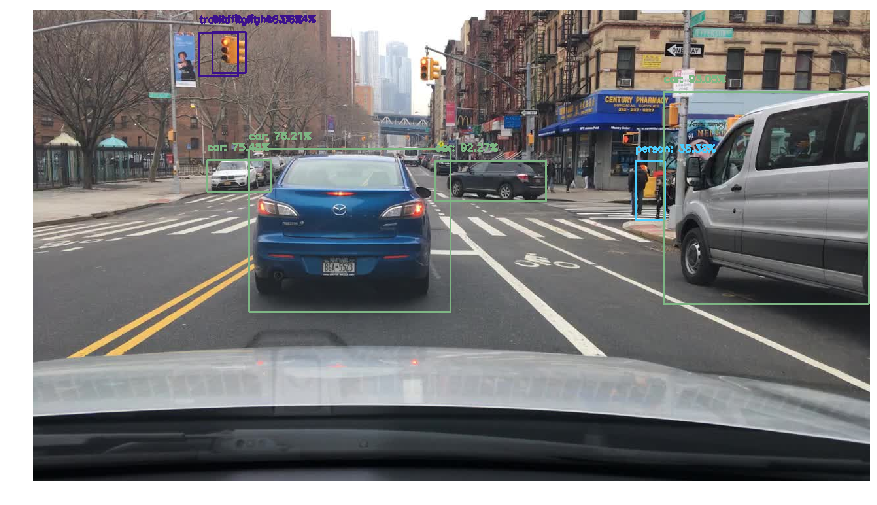

In [184]:
image_path = "../../../datasets/car_scene.jpg"

faster_rcnn_detection(image_path, class_names_path, net,
                      confidence=CONFIDENCE)

Forward Time: Faster RCNN took 10.318590 seconds.


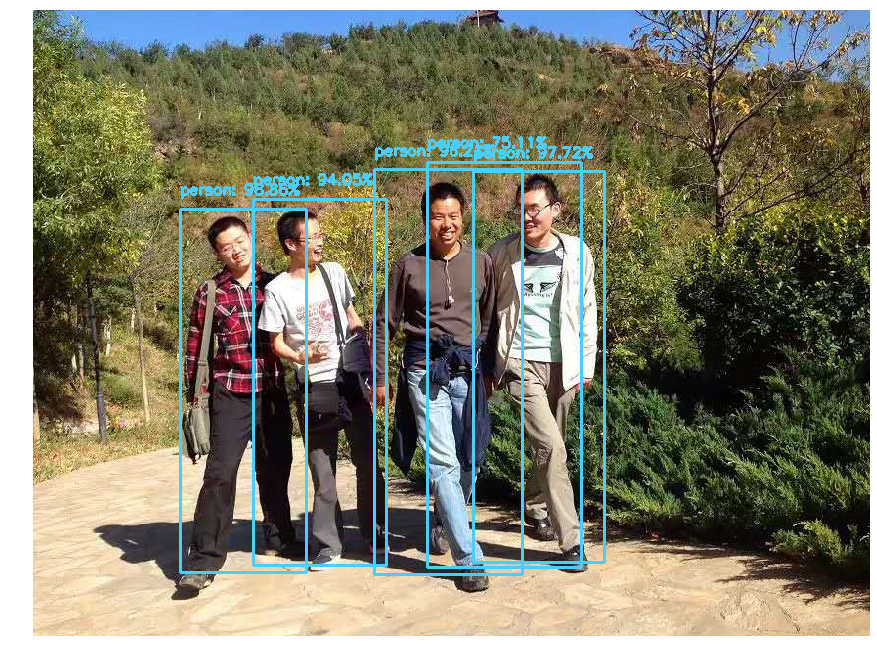

In [183]:
image_path = "../../../datasets/friends.jpg"

faster_rcnn_detection(image_path, class_names_path, net,
                      confidence=CONFIDENCE)